<a href="https://colab.research.google.com/github/TorbjornLarsson/SMI/blob/main/exercises/SML-session_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.neighbors as skl_nb

#from IPython.display import set_matplotlib_formats
#set_matplotlib_formats('png')
from IPython.core.pylabtools import figsize
figsize(10, 6) # Width and hight
#plt.style.use('seaborn-white')

# 4.1 Getting started with classification – Breast cancer diagnosis

In this exercise, we will consider the data set `data/biopsy.csv` with data from breast biopsies, for the purpose of diagnosing breast cancer. For each patient, the data set contains nine different attributes (clump thickness, uniformity of cell size, uniformity of cell shape, marginal adhesion, single epithelial cell size, bare nuclei, bland chromatin, normal nucleoli and mitoses) scored on a scale from $1$ to $10$, as well as the physician’s diagnosis (malign or benign).

## Dataset
This data frame `biopsy` contains the following columns:  
`ID`: sample code number (not unique).  
`V1`: clump thickness.  
`V2`: uniformity of cell size.  
`V3`: uniformity of cell shape.  
`V4`: marginal adhesion.  
`V5`: single epithelial cell size.  
`V6`: bare nuclei (16 values are missing).  
`V7`: bland chromatin.  
`V8`: normal nucleoli.  
`V9`: mitoses.  
`class`: "benign" or "malignant".  

## a)
Load and familiarize yourself with the data set, using, e.g.`info()`, `describe()`, `pandas.plotting.scatter_matrix()` and `print()`.

In [2]:
# url = 'data/biopsy.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/biopsy.csv'
biopsy = pd.read_csv(url, na_values='?', dtype={'ID': str}).dropna().reset_index()

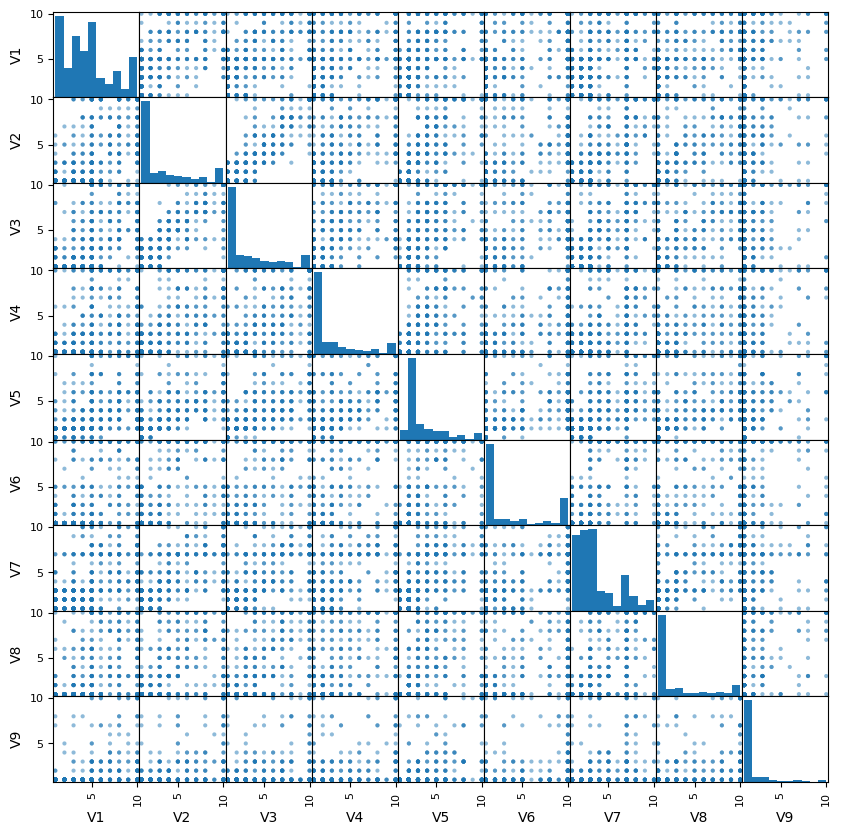

In [6]:
biopsy.head()
biopsy.describe()
pd.plotting.scatter_matrix(biopsy.iloc[:,2:11], figsize=(10,10))
plt.show()

## b)
Split the data randomly into a training set and a test set of approximately similar size.

In [7]:
# sampling indices for training
np.random.seed(1)
trainI=np.random.choice(biopsy.shape[0], size=300, replace=False)
trainIndex=biopsy.index.isin(trainI)
train=biopsy.iloc[trainIndex]
test=biopsy.iloc[~trainIndex]

## c) Logistic regression <a id='4.1-c'></a>
Perform logistic regression with `class` as output variable and `V3`, `V4` and `V5` as input variables. Do a prediction on the test set, and compute (i) the fraction of correct predictions and (ii) the confusion matrix (using, for examnple, `pandas.crosstab()`). The commands `skl_lm.LogisticRegression()` and `model.predict()` are useful. Is the performance any good, and what does the confusion matrix tell you?

In [8]:
model = skl_lm.LogisticRegression(solver='lbfgs')
X_train = train[['V3', 'V4', 'V5']]
Y_train = train['class']
X_test = test[['V3', 'V4', 'V5']]
Y_test = test['class']
model.fit(X_train, Y_train)
print('Model summary:')
print(model)

Model summary:
LogisticRegression()


In [9]:
predict_prob = model.predict_proba(X_test)
print('The class order in the model:')
print(model.classes_)
print('Examples of predicted probablities for the above classes:')
predict_prob[0:5] # inspect the first 5 predictions

The class order in the model:
['benign' 'malignant']
Examples of predicted probablities for the above classes:


array([[0.01147187, 0.98852813],
       [0.99038669, 0.00961331],
       [0.99038669, 0.00961331],
       [0.97524861, 0.02475139],
       [0.99038669, 0.00961331]])

In [10]:
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'benign', 'malignant')
prediction[0:5] # Inspect the first 5 predictions after labeling.


array(['malignant', 'benign', 'benign', 'benign', 'benign'], dtype='<U9')

In [11]:
# Confusion matrix
print("Confusion matrix:\n")
print(pd.crosstab(prediction, Y_test), '\n')
# Accuracy
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")

Confusion matrix:

class      benign  malignant
row_0                       
benign        239         14
malignant      11        119 

Accuracy: 0.935


## d) LDA
Repeat [(c)](#4.1-c) using LDA. A useful command is `sklearn.discriminant_analysis.LinearDiscriminantAnalysis()`. `sklearn.discriminant_analysis` is imported as `skl_da`

In [12]:
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [16]:
predict_prob = model.predict_proba(X_test)
print('The class order in the model:')
print(model.classes_)
print('Examples of predicted probablities for the above classes:')
with np.printoptions(suppress=True, precision=3): # Supress scientific notation, e.g. 1.0e-2.
  print(predict_prob[0:5]) # inspect the first 5 predictions


The class order in the model:
['benign' 'malignant']
Examples of predicted probablities for the above classes:
[[0.078 0.922]
 [0.999 0.001]
 [0.999 0.001]
 [0.998 0.002]
 [0.999 0.001]]


In [20]:
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'benign', 'malignant')
print("First five predictions:")
print(prediction[0:5], '\n') # Inspect the first 5 predictions after labeling.
# Confusion matrix
print("Confusion matrix:")
print(pd.crosstab(prediction, Y_test),'\n')
# Accuracy
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")


First five predictions:
['malignant' 'benign' 'benign' 'benign' 'benign'] 

Confusion matrix:
class      benign  malignant
row_0                       
benign        243         25
malignant       7        108 

Accuracy: 0.916


## e) QDA
Repeat [(c)](#4.1-c) using QDA. A useful command is `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis()`.

In [21]:
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)

QuadraticDiscriminantAnalysis()

In [22]:
predict_prob = model.predict_proba(X_test)
print('The class order in the model:')
print(model.classes_, '\n')
print('Examples of predicted probablities for the above classes:')
with np.printoptions(suppress=True, precision=3):
 print(predict_prob[0:5]) # inspect the first 5 predictions

The class order in the model:
['benign' 'malignant'] 

Examples of predicted probablities for the above classes:
[[0.    1.   ]
 [0.999 0.001]
 [0.999 0.001]
 [0.998 0.002]
 [0.999 0.001]]


In [24]:
prediction = np.empty(len(X_test), dtype=object)
prediction = np.where(predict_prob[:, 0]>=0.5, 'benign', 'malignant')
print('Frist five predictions:')
print(prediction[0:5], '\n') # Inspect the first 5 predictions after labeling.
# Confusion matrix
print('Confusion matrix:\n')
print(pd.crosstab(prediction, Y_test), '\n')
# Accuracy
print('Accuracy:')
print(f"{np.mean(prediction == Y_test):.3f}")


Frist five predictions:
['malignant' 'benign' 'benign' 'benign' 'benign'] 

Confusion matrix:

class      benign  malignant
row_0                       
benign        237         12
malignant      13        121 

Accuracy:
0.935


## f) KNN
Repeat [(c)](#4.1-c) using $k$-NN (with $k = 1$). A useful commands is `sklearn.neighbors.KNeighborsClassifier()`.

In [25]:
model = skl_nb.KNeighborsClassifier(n_neighbors=1)
model.fit(X_train, Y_train)


KNeighborsClassifier(n_neighbors=1)

In [26]:
prediction = model.predict(X_test)
print('Confusion matrix:\n')
print(pd.crosstab(prediction, Y_test), '\n')
print(f"Accuracy: {np.mean(prediction == Y_test):.3f}")


Confusion matrix:

class      benign  malignant
row_0                       
benign        240         19
malignant      10        114 

Accuracy: 0.924


## g) Try different values for KNN
Use a `for`-loop to explore the performance of $k$-NN for different values of $k$, and plot the fraction of correct
predictions as a function of $k$.

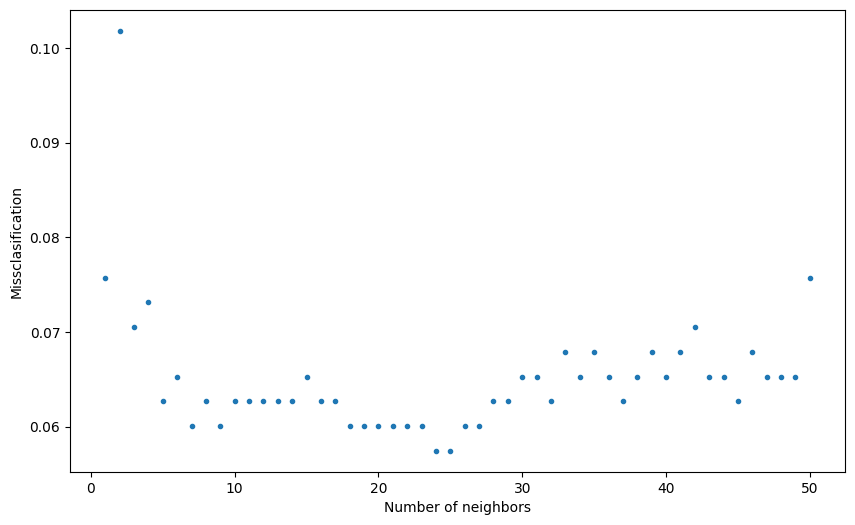

In [27]:
misclassification = []
for k in range(50): # Try n_neighbors = 1, 2, ...., 50
 model = skl_nb.KNeighborsClassifier(n_neighbors=k+1)
 model.fit(X_train, Y_train)
 prediction = model.predict(X_test)
 misclassification.append(np.mean(prediction != Y_test))
K = np.linspace(1, 50, 50)
plt.plot(K, misclassification,'.')
plt.ylabel('Missclasification')
plt.xlabel('Number of neighbors')
plt.show()

## h) ROC for logistic regression
Use a `for`-loop to explore how the true and false positive rates in logistic regression are affected by different threshold values, and plot the result as a `ROC curve`. (see Figure 4.7 and Table 4.1 in the book).

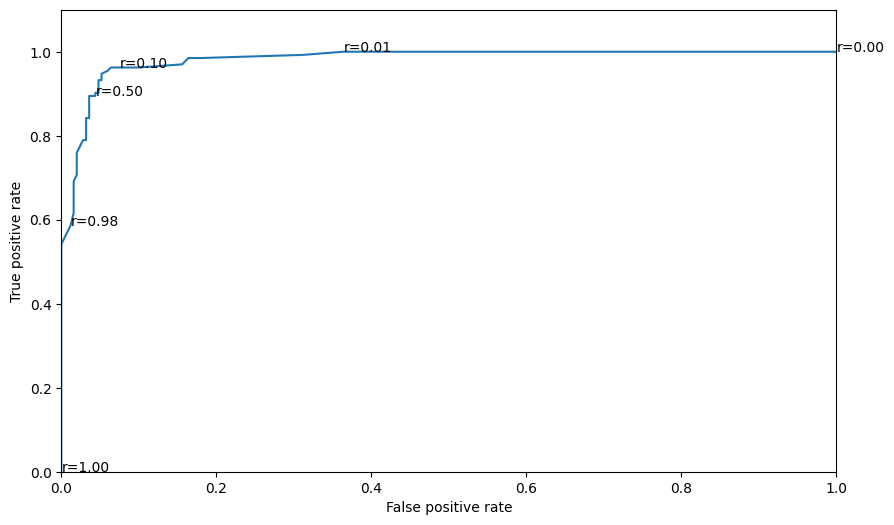

In [29]:
true_postive_rate = []
false_positive_rate = []
positive_class = 'malignant'
negative_class = 'benign'
P = np.sum(Y_test == positive_class) # Number of positive examples in testdata
N = np.sum(Y_test == negative_class) # Number of negative samples in test data
threshold = np.linspace(0.00, 1, 101)
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)
predict_prob = model.predict_proba(X_test)
positive_class_index = np.argwhere(model.classes_ == positive_class).squeeze()
for r in threshold:
 prediction = np.where(predict_prob[:, positive_class_index] > r,
 positive_class,
negative_class)

 FP = np.sum((prediction==positive_class)&(Y_test==negative_class)) # False Positive
 TP = np.sum((prediction==positive_class)&(Y_test==positive_class)) # True positive

 false_positive_rate.append(FP/N)
 true_postive_rate.append(TP/P)
plt.plot(false_positive_rate, true_postive_rate);
for idx in [0, 1, 10, 50, 98, 100]:
 plt.text(false_positive_rate[idx], true_postive_rate[idx], f"r={threshold[idx]:.2f}")
plt.xlim([0,1])
plt.ylim([0,1.1]);
plt.xlabel('False positive rate')
plt.ylabel('True positive rate');


## i)
Try to find another set of inputs (perhaps by also considering transformations of the attributes) which gives a better result than you have achieved so far. You may also play with the threshold values. (“Better” is on purpose left vague. For this problem, the implications of a false negative (=`benign`) misclassification is probably more severe than a false positive (=`malignant`) misclassification.)

# 4.2 Decision boundaries
The following code generates some data with $x_1$ and $x_2$ both in $[0, 10]$ and $y$ either $0$ or $1$, and plots the decision boundary for a logistic regression model.

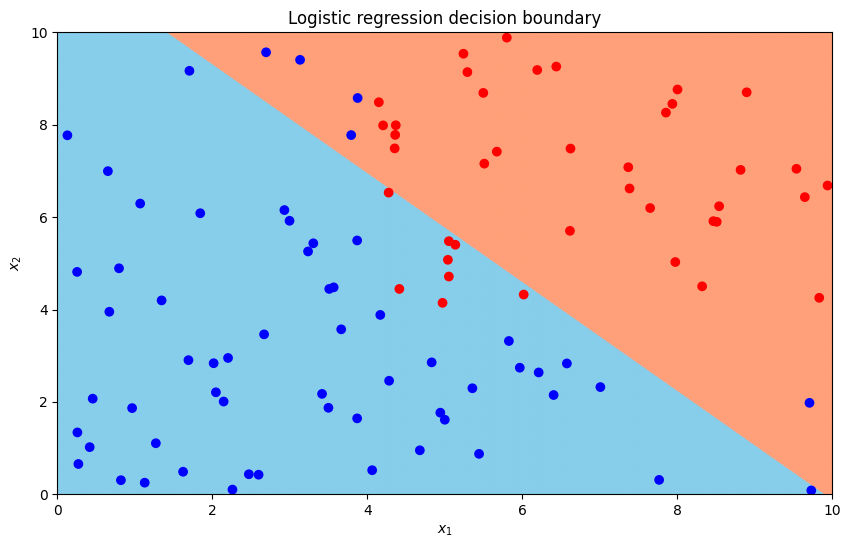

In [30]:
# generate data
np.random.seed(2)
N = 100
x1 = np.random.uniform(0, 10, N)
x2 = np.random.uniform(0, 10, N)
y = np.ones(N)
y[x1<4] = 0
y[x2<4] = 0
X = pd.DataFrame({'x1': x1, 'x2': x2})

# learn a logistic regression model
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X, y)

# classify the points in the whole domain
res = 0.01   # resolution of the squares
xs1 = np.arange(0, 10 + res, res)
xs2 = np.arange(0, 10 + res, res)
xs1, xs2 = np.meshgrid(xs1, xs2)    # Creating the grid for all the data points
X_all = pd.DataFrame({'x1': xs1.flatten(), 'x2': xs2.flatten()})
prediction = model.predict(X_all)

from matplotlib.colors import LinearSegmentedColormap
mycmap = LinearSegmentedColormap.from_list('mycmap', ['skyblue', 'lightsalmon'])
plt.imshow(prediction.reshape(xs1.shape[0],-1),
           cmap=mycmap,
           origin='lower',
           extent=[0,10,0,10],
           aspect='auto')

# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr') # blue - white -red colormap

plt.title('Logistic regression decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

## (a)
Run the code and verify that it reproduces the figure, and make sure you understand the figure. What is the misclassification rate here?

In [31]:
# In this problem, the misclassification rate for the logistic regression is 13%
# (the number of points that are in the wrong region in the figure)
y_hat = model.predict(X)
print("Misclassification rate:", 100*np.sum(y_hat != y)/y.shape[0], "%")

Misclassification rate: 13.0 %


## (b)
Modify the code to plot the decision boundary for a LDA classifier. What differences do you see? What is the misclassification rate?

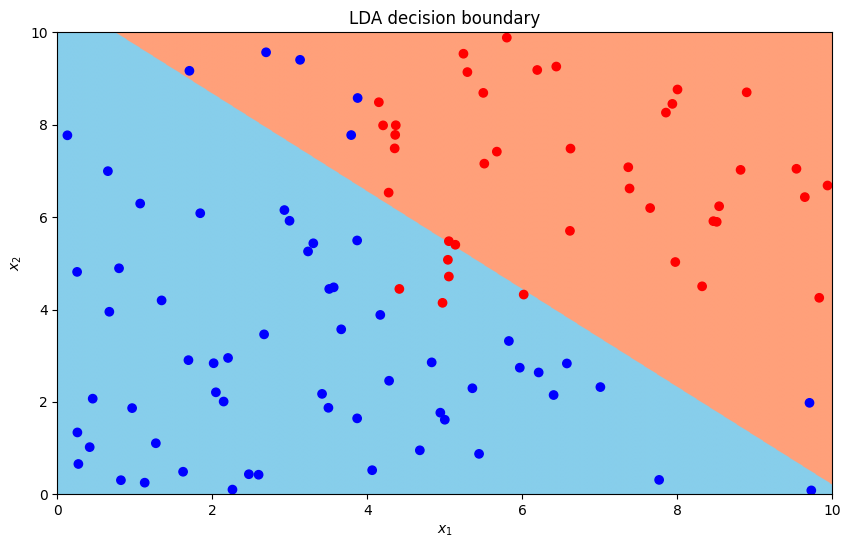

Misclassification rate: 11.0 %


In [32]:
# learn a LDA model
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X, y)
# classify many points, and plot a colored square around each point
prediction = model.predict(X_all)
# Plot of the prediction for all the points in the space
plt.imshow(prediction.reshape(xs1.shape[0],-1),
 cmap=mycmap,
 origin='lower',
 extent=[0,10,0,10],
 aspect='auto')
# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr')
plt.title('LDA decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
# Misclassification rate 11%.
# Note that the decision boundaries for both logistic regression and
# LDA are linear, but not identical.
y_hat = model.predict(X)
print("Misclassification rate:", 100*np.sum(y_hat != y)/y.shape[0], "%")


## (c)
Modify the code to plot the decision boundary for a QDA classifier. What differences do you see? What is the misclassification rate?

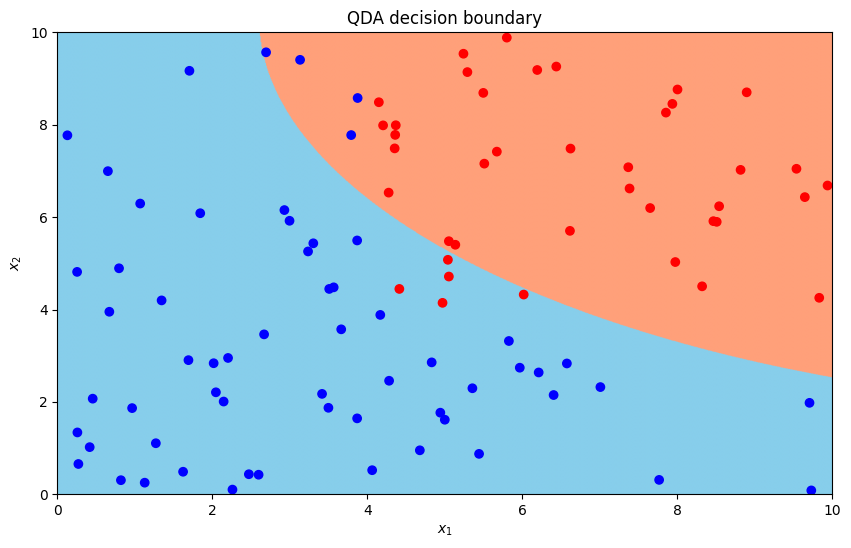

Misclassification rate: 9.0 %


In [33]:
# learn a QDA model
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X, y)
# classify many points, and plot a colored square around each point
prediction = model.predict(X_all)
# Plot of the prediction for all the points in the space
plt.imshow(prediction.reshape(xs1.shape[0],-1),
 cmap=mycmap,
 origin='lower',
 extent=[0,10,0,10],
 aspect='auto')
# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr')
plt.title('QDA decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
y_hat = model.predict(X)
print("Misclassification rate:", 100*np.sum(y_hat != y)/y.shape[0], "%")
# Misclassification rate 9%. The decision boundary of QDA is not linear.


## (d)
Modify the code to plot the decision boundary for a $k$-NN classifier. What differences do you see? What is the misclassification rate?

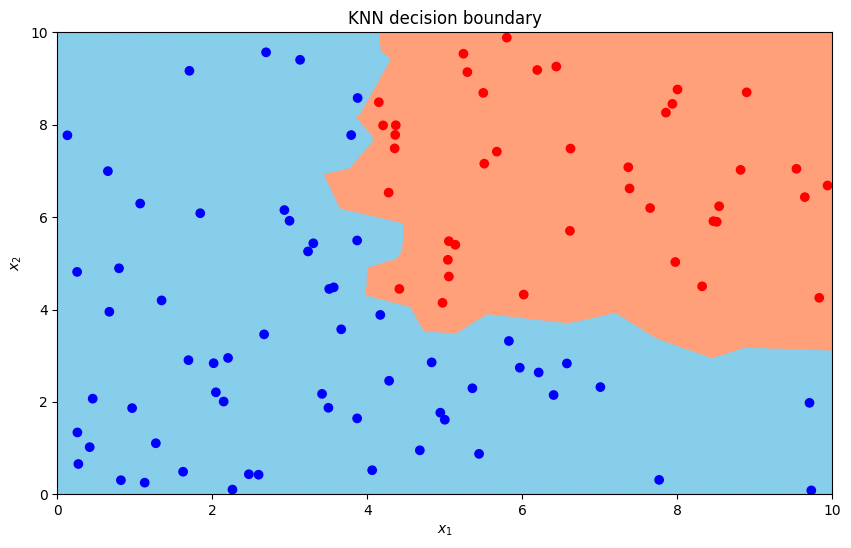

Misclassification rate: 0.0 %


In [34]:
# learn a KNN model with k=1
model = skl_nb.KNeighborsClassifier(n_neighbors=1)
model.fit(X, y)
# classify many points, and plot a colored square around each point
prediction = model.predict(X_all)
# Plot of the prediction for all the points in the space
plt.imshow(prediction.reshape(xs1.shape[0],-1),
 cmap=mycmap,
 origin='lower',
 extent=[0,10,0,10],
 aspect='auto')
# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr')
plt.title('KNN decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
y_hat = model.predict(X)
print("Misclassification rate:", 100*np.sum(y_hat != y)/y.shape[0], "%")
# The misclassification rate is 0% (which always is the case when k = 1).
# The misclassification rate for a test data set could still be much worse.

## (e)
What happens with the decision boundary for logistic regression if you include the term $x_1x_2$ as an input? What is the misclassification rate?

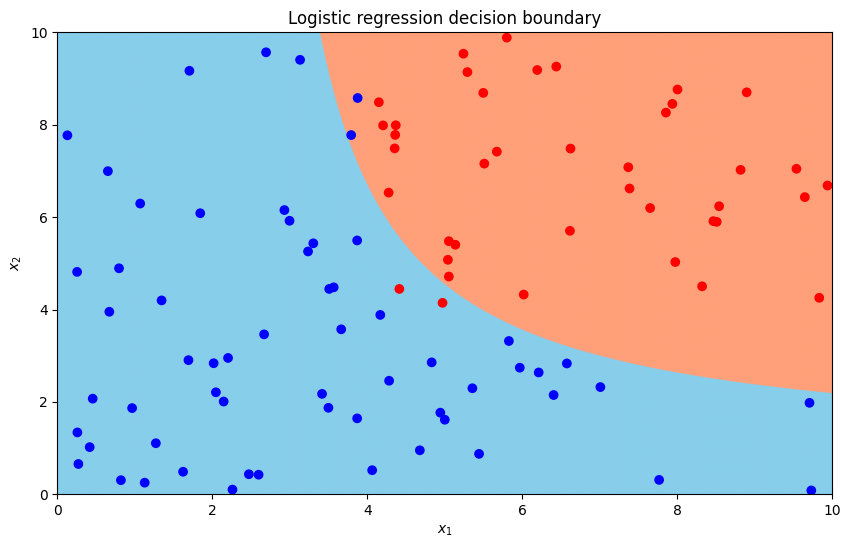

Misclassification rate: 4.0 %


In [35]:
# learn a logistic regression model including the term X1*X2 as an input
X['x1x2'] = X['x1']*X['x2']
model = skl_lm.LogisticRegression(solver='lbfgs')
model.fit(X, y)
# classify many points, and plot a colored square around each point
X_all['x1x2'] = X_all['x1'] * X_all['x2']
prediction = model.predict(X_all)
# Plot of the prediction for all the points in the space
plt.imshow(prediction.reshape(xs1.shape[0],-1),
 cmap=mycmap,
 origin='lower',
 extent=[0,10,0,10],
 aspect='auto')
# Plot of the data points and their label
plt.scatter(x1, x2, c=y, cmap='bwr')
plt.title('Logistic regression decision boundary')
plt.xlim([0,10])
plt.ylim([0,10])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()
y_hat = model.predict(X)
print("Misclassification rate:", 100*np.sum(y_hat != y)/y.shape[0], "%")
# Misclassification rate 4%. Using nonlinear transformations of the inputs
# is one way to create a nonlinear decision boundary in a linear model.
# However, the decision boundary in a 3D-plot plot with axes
# `x1`, `x2` and `x1x2` would still be linear.


# 4.3 Why not linear regression?
In this exercise, we explore why linear regression might not be well suited for classification problems.

## (a)
Construct and plot a data set as follows: Let $x_i$ be samples $x_i = i$ in a sequence from $i = 1$ to $i = 40$. Let $y_i = 0$ for all $i = 1 : 40$, except for $i = 34, 38, 39, 40$ where $y_i = 1$. Hence, $y$ belongs to either of two classes, $0$ and $1$.

In [36]:
x = np.arange(40)+1
y = np.repeat(0, 40)
y[[33, 37, 38, 39]] = 1

## (b)
Now, the problem is to fit a model which is able to predict the output $y$ from the input $x$. Start with a linear regression model (command `skl_lm.LinearRegression()`), and simply threshold its predictions at 0.5 (the average of 0 and 1, the two classes). Plot the prediction. How good is the prediction?

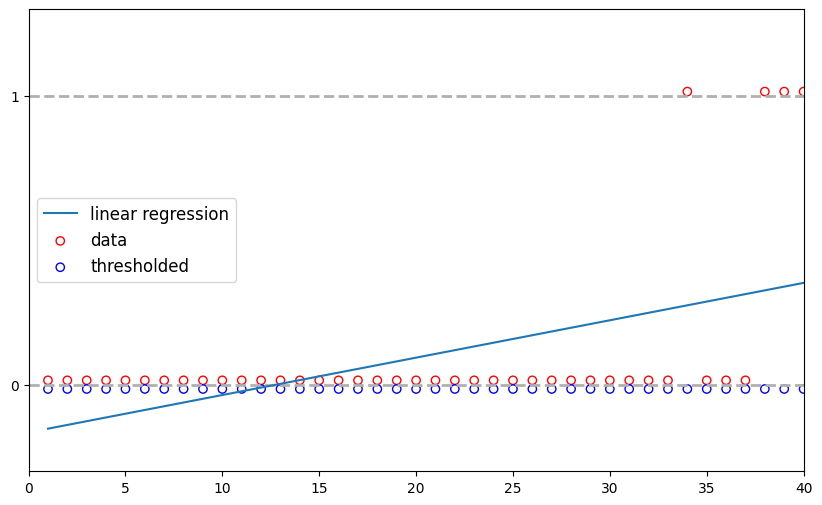

In [39]:
model = skl_lm.LinearRegression()
model.fit(x.reshape(-1,1), y) # reshape because the model requires input to be a 2D-array
prediction = model.predict(x.reshape(-1,1))
prediction_class = np.zeros(40)
prediction_class[prediction>=0.5] = 1
plt.plot(x, prediction, label='linear regression')
plt.scatter(x, y+.015, marker='o', facecolors='none', edgecolors='r', label='data')
plt.scatter(x,
 prediction_class-.015,
 marker='o',
 facecolors='none',
 edgecolors='b',
 label='thresholded')
plt.yticks([0,1])
plt.grid(axis='y', linewidth=2, linestyle='dashed')
plt.xlim(0, 40)
plt.ylim([-0.3,1.3])
plt.legend(loc='center left', fontsize='large')
plt.show()


## (c)
Try instead logistic regression using `skl_lm.LogisticRegression()` command (set the parameter `C` to $1000$) and plot the prediction. How good is the prediction, and what advantages does logistic regression have over linear regression for this classification problem?  

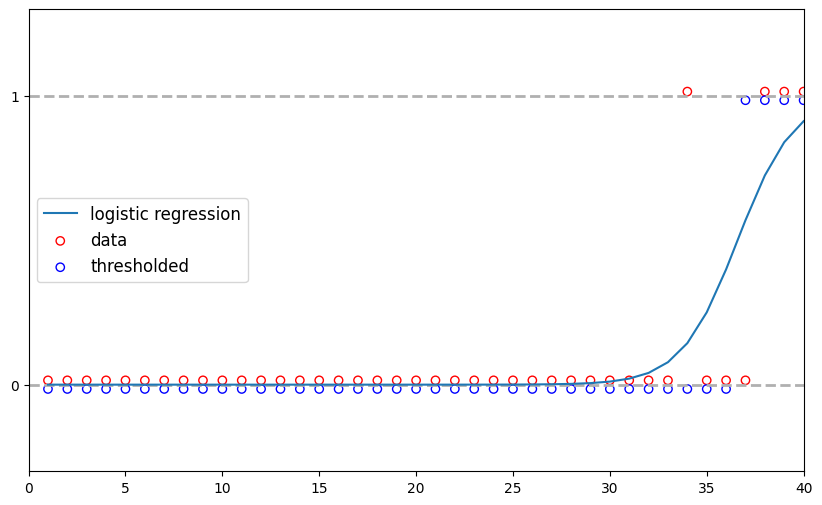

In [40]:
# c)
model = skl_lm.LogisticRegression(C=1000, solver='lbfgs')
model.fit(x.reshape(-1,1), y)
prediction = model.predict_proba(x.reshape(-1,1))
prediction_class = np.repeat(0, 40)
prediction_class[prediction[:, 1]>=0.5] = 1
plt.plot(x, prediction[:, 1], label='logistic regression')
plt.scatter(x, y+.015, marker='o', facecolors='none', edgecolors='r', label='data')
plt.scatter(x,
 prediction_class-.015,
 marker='o',
 facecolors='none',
 edgecolors='b',
 label='thresholded')
plt.yticks([0,1])
plt.grid(axis='y', linewidth=2, linestyle='dashed')
plt.xlim(0, 40)
plt.ylim([-0.3,1.3])
plt.legend(loc='center left', fontsize='large')
plt.show()


# 4.4 k-NN
In this exercise, we are going to explore an important user aspect of $k$-NN.

## (a)
Make $200$ draws $x_1$ from a $\mathcal{N}(0, 1^2)$ distribution, and $200$ draws $x_2$ from $\mathcal{N}(0, 10^4)$. Also construct $y$ such that $y = 1$ if $x_1 \cdot x_2$ is positive, and $0$ otherwise. Split the data set randomly into a test and a training data set (equally sized).

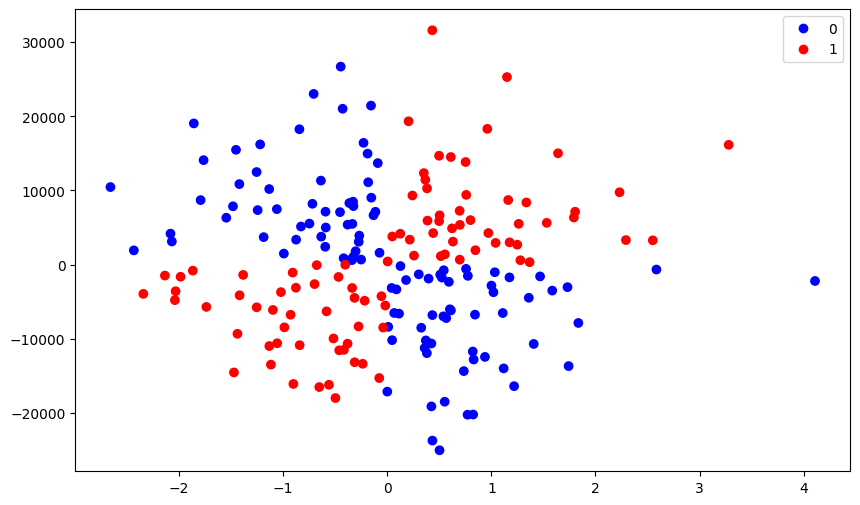

In [43]:
np.random.seed(2)
N = 200
x1 = np.random.normal(0, 1**2, 200)
x2 = np.random.normal(0, 10**4, 200)
y_a = np.zeros(N)
y_a[x1*x2 > 0] = 1
X_a = pd.DataFrame({'x1': x1, 'x2': x2})
X_a_train = X_a.iloc[:100, :]
X_a_test = X_a.iloc[-100:, :]
y_a_train = y_a[:100]
y_a_test = y_a[-100:]
scatter = plt.scatter(X_a['x1'], X_a['x2'], c=y_a, cmap='bwr');
plt.legend(*scatter.legend_elements());


## (b)
Use $k$-NN (choose $k$ yourself) to predict the test output $y$ using $x_1$ and $x_2$ as inputs. How well do you perform?

In [45]:
model = skl_nb.KNeighborsClassifier(n_neighbors=2)
model.fit(X_a_train, y_a_train)
prediction_a = model.predict(X_a_test)
print(f"Accuracy: {np.mean(prediction_a == y_a_test)}")


Accuracy: 0.46


## (c)
Now replace $x_2$ with $200$ draws from $\mathcal{N}(0, 1^2)$, and perform $k$-NN classification anew. How well do you perform this time? Explain the difference!

In [46]:
# c)
np.random.seed(2)
N = 200
x1 = np.random.normal(size=N)
x2 = np.random.normal(size=N)
y_b = 1*(x1*x2>0)
X_b = pd.DataFrame({'x1': x1, 'x2': x2})
X_b_train = X_b.iloc[:100, :]
X_b_test = X_b.iloc[-100:, :]
y_b_train = y_b[:100]
y_b_test = y_b[-100:]
model = skl_nb.KNeighborsClassifier(n_neighbors=3)
model.fit(X_b_train, y_b_train)
prediction_b = model.predict(X_b_test)
print(f"Accuracy: {np.mean(prediction_b == y_b_test)}")

Accuracy: 0.92


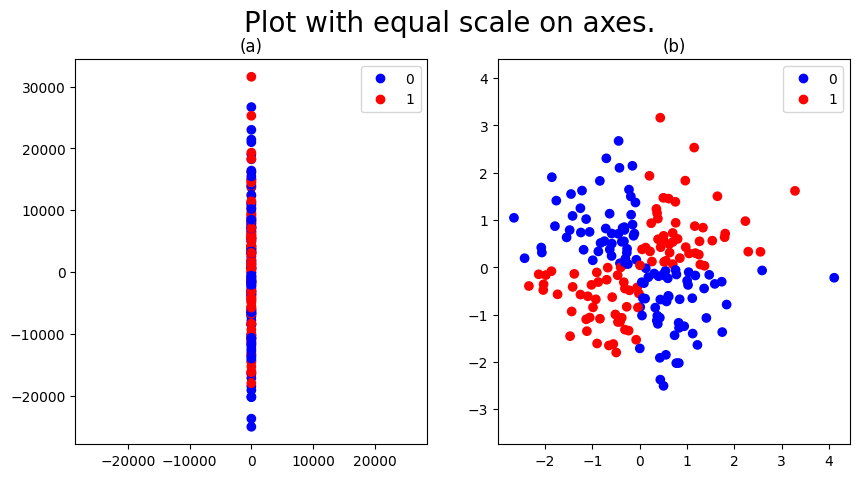

In [47]:
# k-NN is based on the Euclidian distance between data points. In our
# problem in (b), the values of x2 is on average 100 times larger than
# the values of x1, and hence does the prediction essentially only
# depend on x2 (e.g., the distance between (0.1,10) and (0.1,-10)
# is larger than the distance between (0.1,10) and (-0.1,-9),
# e.g., X_1 does effectively not matter when determining the k nearest
# neighbors). However, since y depends both on x1 and x2, the
# performance is deteriorated. Now, when removing the magnitude
# difference between x1 and x2, both inputs will impact the k-NN
# prediction equally.
fig, ax = plt.subplots(1,2, figsize=(10,5))
scatter_a = ax[0].scatter(X_a['x1'], X_a['x2'], c=y_a, cmap='bwr');
scatter_b = ax[1].scatter(X_b['x1'], X_b['x2'], c=y_b, cmap='bwr');
ax[0].legend(*scatter_a.legend_elements());
ax[1].legend(*scatter_b.legend_elements());
ax[0].axis('equal')
ax[1].axis('equal');
fig.suptitle('Plot with equal scale on axes.', fontsize=20)
ax[0].set_title('(a)')
ax[1].set_title('(b)');


## (d)
Explore how the `sklearn.preprocessing.scale()` function can help for such problems encountered in (b)!

In [48]:
# scale() can be used to standarize a dataset.
# You can do this before splitting up the
# dataset in traineng and test data.
# However, you have to do the same scaling
# of future, yet unseen, data. We use
# StandardScaler() for return a scaler
# that remembers the transofmration
# so we can reuse it for new data.
scaler = skl_pre.StandardScaler().fit(X_a_train)
model = skl_nb.KNeighborsClassifier(n_neighbors=2)
model.fit(scaler.transform(X_a_train), y_a_train)
prediction = model.predict(scaler.transform(X_a_test))
print(f"Accuracy: {np.mean(prediction == y_a_test)}")

Accuracy: 0.92


# 4.5 Multiclass classification
In the course, we have focused on the classification problem for 2 classes. The methods can, however, be generalized to more than two classes. In `Python`, the commands `skl_da.LinearDiscriminantAnalysis()`, `skl_da.QuadraticDiscriminantAnalysis()` and `skl_nb.KNeighborsClassifier()` can all be used directly for multi-class problems as well, which we will do in this exercise.

## (a)
Load and familiarize yourself with the data set `iris`, and split it randomly into a training and a test data set.

**Description**

This famous (Fisher's or Anderson's) `iris` data set gives the measurements in centimeters of the variables sepal length and width and petal length and width, respectively, for $50$ flowers from each of $3$ species of iris. The species are Iris setosa, versicolor, and virginica.

**Format**

iris is a data frame with $150$ cases (rows) and $5$ variables (columns) named `Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`, and `Species`.

In [49]:
# url = 'data/iris.csv'
url = 'https://uu-sml.github.io/course-sml-public/data/iris.csv'
iris = pd.read_csv(url)

In [50]:
# sampling indices for training
np.random.seed(1)
iris.info()
trainI = np.random.choice(iris.shape[0], size=100, replace=False)
trainIndex = iris.index.isin(trainI)
iris_train = iris.iloc[trainIndex] # training set
iris_test = iris.iloc[~trainIndex] # test set


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## (b)
Use all inputs (`Sepal.Length`, `Sepal.Width`, `Petal.Length`, `Petal.Width`) to predict the output `Species` (`setosa`,
`versicolor` and `virginica`) using LDA, QDA, and $k$-NN, respectively.

In [52]:
input_variables = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']
X_train = iris_train[input_variables]
Y_train = iris_train['Species']
X_test = iris_test[input_variables]
Y_test = iris_test['Species']
# LDA
model = skl_da.LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print(f"Accuracy LDA: {np.mean(prediction == Y_test)}")
# QDA
model = skl_da.QuadraticDiscriminantAnalysis()
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print(f"Accuracy QDA: {np.mean(prediction == Y_test)}")
# KNN
model = skl_nb.KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, Y_train)
prediction = model.predict(X_test)
print(f"Accuracy KNN: {np.mean(prediction == Y_test)}")

Accuracy LDA: 0.96
Accuracy QDA: 0.94
Accuracy KNN: 0.9
